Restricted Boltzmann Machines
=============================

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import copy
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False

if 'google.colab' in sys.modules and 'sklearn' not in sys.modules:
    !pip3 install scikit-learn

from keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM

We consider some utility functions to be used later.

In [ ]:
def rbm_gibbs_sample_image(rbm, im, steps):
    assert len(im.shape) < 3
    if len(im.shape) == 2:
        rows = im.shape[0]
        cols = im.shape[1]
        im = im.reshape((-1))
    else:
        im = im.copy()
    for _ in range(steps):
        im = rbm.gibbs(im)
        if len(im.shape) == 2:
            if rows is not None and cols is not None:
                im = im.reshape((rows, cols))
    return im.astype('float32')

def image_palette(X, nr = None, m = 20):
    if nr is None:
        nr = X.shape[0]
    return np.rollaxis(np.rollaxis(X[0:nr].reshape(m, -1, 28, 28), 0, 2), 1, 3).reshape(-1, m * 28)

def remove_rows(X, start, end):
    X = X.copy()
    if len(X.shape) == 2:
        X[start:end] = 0
    elif len(X.shape) == 3:
        X[:,start:end] = 0
    return X

Load the Dataset
----------------
Good ol' MNIST.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_test = X_test[0:100]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(np.float64(-0.5), np.float64(559.5), np.float64(139.5), np.float64(-0.5))

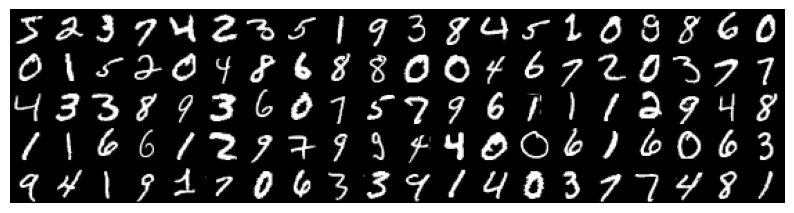

In [ ]:
flattened_images = image_palette(X_train, 100)
plt.figure(figsize=(10,20))
plt.imshow(flattened_images)
plt.axis('off')

Train the RBM
-------------
**Exercise** What is the effect of the different parameters: **n_components**, **learning_rate**, **n_iter**. These parameters are, respectively, the number of components, the learning rate and the number of iterations. <br/>
Evaluate the performance visually in the next code cell.


In [ ]:
rbm = BernoulliRBM(n_components=10, learning_rate=0.01, n_iter=10, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -196.74, time = 7.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -196.54, time = 6.71s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -196.54, time = 2.69s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.41, time = 2.69s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -196.40, time = 3.34s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -188.83, time = 3.36s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -187.32, time = 4.78s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -186.71, time = 3.30s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -187.04, time = 4.04s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -187.61, time = 2.73s


BernoulliRBM(learning_rate=0.01, n_components=10, random_state=0, verbose=True)

In [ ]:
rbm = BernoulliRBM(n_components=50, learning_rate=0.01, n_iter=10, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -141.18, time = 4.56s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -124.16, time = 6.42s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -117.45, time = 5.91s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -111.97, time = 6.77s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -108.08, time = 5.31s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -104.85, time = 6.48s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -103.00, time = 5.61s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -100.67, time = 6.49s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -99.82, time = 5.74s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -98.75, time = 5.49s


BernoulliRBM(learning_rate=0.01, n_components=50, random_state=0, verbose=True)

In [ ]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=10, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.24, time = 11.38s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -98.44, time = 13.20s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -92.52, time = 13.15s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.83, time = 14.10s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.67, time = 12.71s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -84.09, time = 13.34s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.24, time = 13.43s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -80.56, time = 13.56s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.00, time = 13.58s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -79.74, time = 13.29s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

50 components achieve much higher pseudo-likelihood than 10 components; 100 components increase it further but there are signs of diminishing returns at this point.

Moreover, increasing the number of components is computationally heavier and slower.

In [ ]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.001, n_iter=10, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -187.80, time = 12.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -155.27, time = 13.20s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -142.11, time = 13.74s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -133.79, time = 13.40s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -127.12, time = 13.61s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -122.10, time = 16.41s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -118.11, time = 14.17s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -114.93, time = 13.58s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -112.04, time = 13.67s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -109.78, time = 13.59s


BernoulliRBM(learning_rate=0.001, n_components=100, random_state=0,
             verbose=True)

In [ ]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.05, n_iter=10, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -95.06, time = 12.53s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -92.64, time = 13.70s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -91.91, time = 13.72s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -90.55, time = 13.45s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -87.11, time = 13.37s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -89.30, time = 13.72s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -89.94, time = 13.46s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -89.49, time = 13.30s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -89.32, time = 13.43s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -87.49, time = 14.80s


BernoulliRBM(learning_rate=0.05, n_components=100, random_state=0, verbose=True)

In [ ]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.1, n_iter=10, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -101.42, time = 14.40s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -100.60, time = 13.39s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -101.44, time = 13.39s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -99.74, time = 13.31s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -103.13, time = 13.42s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -97.94, time = 13.38s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -97.58, time = 13.36s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -96.76, time = 13.46s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -99.47, time = 13.43s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -96.93, time = 13.40s


BernoulliRBM(n_components=100, random_state=0, verbose=True)

A learning rate of 0.01 gives the best results.

In [ ]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=30, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.24, time = 12.75s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -98.44, time = 13.87s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -92.52, time = 13.39s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.83, time = 13.64s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.67, time = 15.39s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -84.09, time = 13.23s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.24, time = 13.27s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -80.56, time = 12.98s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.00, time = 12.80s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -79.74, time = 13.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -78.45, time = 13.23s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -78.33, time = 12.76s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -78.41, time = 13.03s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -77.58, time = 12.97s
[BernoulliRBM]

BernoulliRBM(learning_rate=0.01, n_components=100, n_iter=30, random_state=0,
             verbose=True)

Increasing the number of iterations from 10 to 20 or 30 yields marginally lower pseudo-likelihood values. Given that the training also takes 2 or 3 times as long, however, more than 10 iterations are likely not worth it unless obtaining maximal pseudolikelihood is paramount.

Sample the Trained RBM and Show the Results
-------------------------------------------
The gibbs_steps variable determines how many Gibbs sampling steps will be performed for each test image i.e. with the test images as initialization. <br/>
**Exercise** Try different values and observe the result. Can you explain the result? <br/>
Compare the result with the original test images, shown one cell lower.


In [ ]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=20, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.24, time = 20.74s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -98.44, time = 11.43s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -92.52, time = 11.54s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.83, time = 11.43s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.67, time = 8.85s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -84.09, time = 11.05s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.24, time = 11.46s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -80.56, time = 12.08s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.00, time = 13.95s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -79.74, time = 11.37s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -78.45, time = 11.39s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -78.33, time = 9.24s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -78.41, time = 10.61s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -77.58, time = 11.59s
[BernoulliRBM] I

BernoulliRBM(learning_rate=0.01, n_components=100, n_iter=20, random_state=0,
             verbose=True)

X_test:


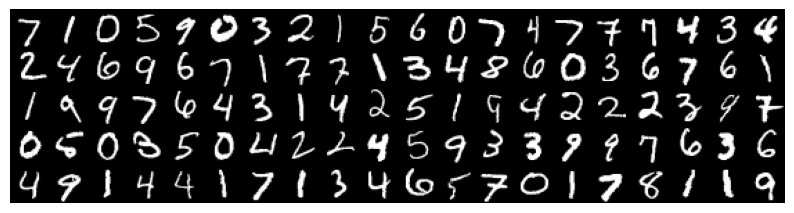

Gibbs steps: 1


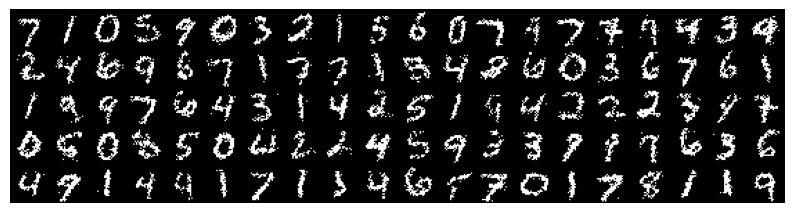

Gibbs steps: 5


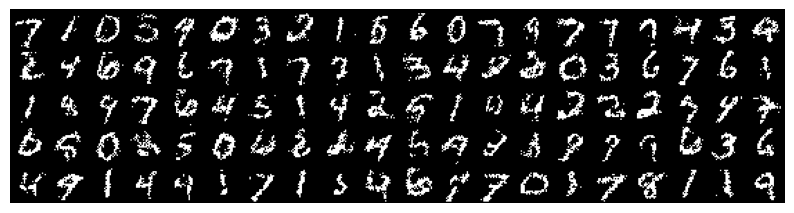

Gibbs steps: 100


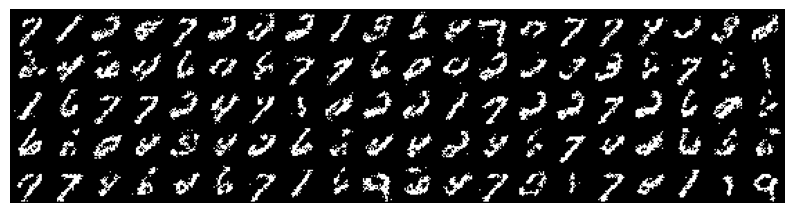

X_train:


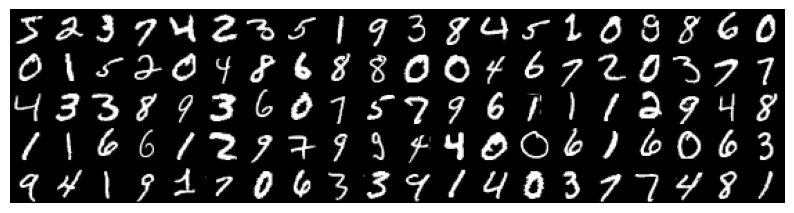

In [ ]:
print("X_test:")
plt.figure(figsize=(10,20))
plt.imshow(image_palette(X_test))
plt.axis('off')
plt.show()

for gibbs_steps in [1, 5, 100]:
    rbm2 = copy.deepcopy(rbm)

    a = X_test.copy()
    for i in range(a.shape[0]):
        for j in range(gibbs_steps):
            a[i] = rbm2.gibbs(a[i])
    print(f"Gibbs steps: {gibbs_steps}")
    plt.figure(figsize=(10,20))
    plt.imshow(image_palette(a))
    plt.axis('off')
    plt.show()

print("X_train:")
plt.figure(figsize=(10,20))
plt.imshow(image_palette(X_train, 100))
plt.axis('off')
plt.show()

## Reconstruction of Unseen Images
In this cell, we will remove pixel rows from certain images. Using the recently trained RBM, we will then try to reconstruct the original images.  <br/>
The following variables control this process: <br/>


*   **reconstruction_gibbs_steps**: The number of gibbs steps used to reconstruct the image.
*   **start_test_index**: The first index of the test set to use.
*   **nr**: the number of images starting from **start_test_index** to reconstruct.
*   **start_row_to_remove**:  The index of the first row that should be removed.
*   **end_row_to_remove**: The index up to which the rows should be removed.

**Exercise** Adjust these variables and observe the result of the reconstruction in the shown image.
What is the role of the previously seen RBM hyperparameters on the reconstruction? <br/>
How many rows can you remove such that reconstruction is still possible? <br/>
In the next code cell, the removed rows will be replaced by the reconstructed rows.





start_row_to_remove = 0, end_row_to_remove = 10
reconstruction_gibbs_steps = 1


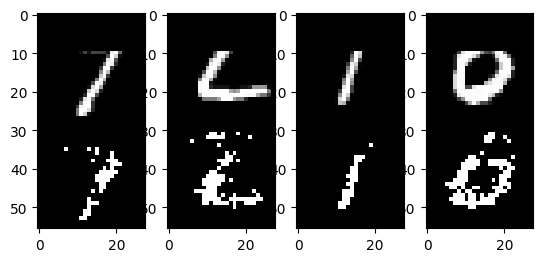

reconstruction_gibbs_steps = 5


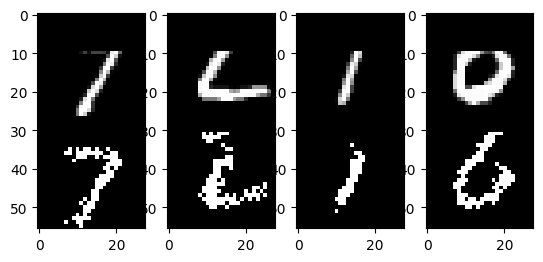

reconstruction_gibbs_steps = 10


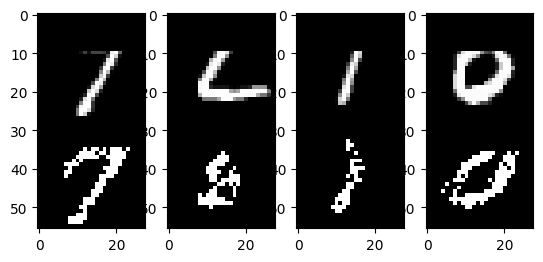

reconstruction_gibbs_steps = 100


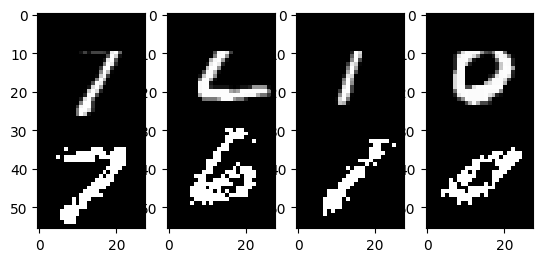


start_row_to_remove = 0, end_row_to_remove = 13
reconstruction_gibbs_steps = 1


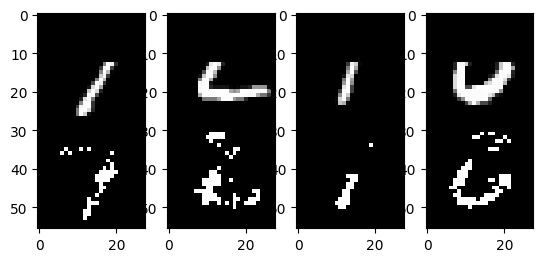

reconstruction_gibbs_steps = 5


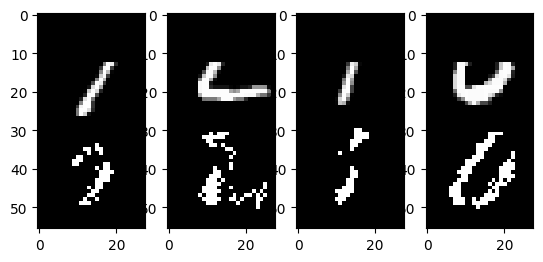

reconstruction_gibbs_steps = 10


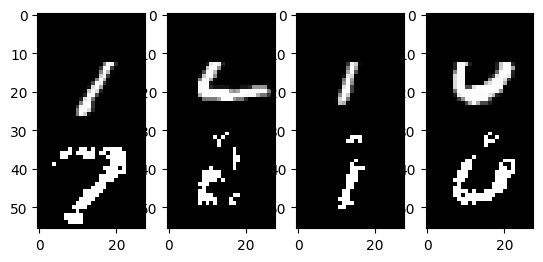

reconstruction_gibbs_steps = 100


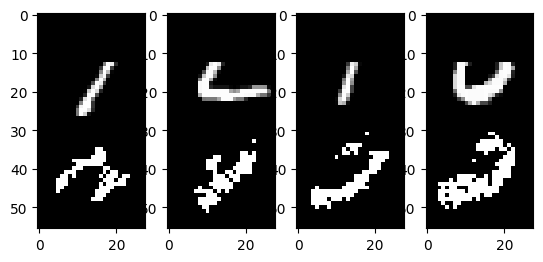


start_row_to_remove = 0, end_row_to_remove = 15
reconstruction_gibbs_steps = 1


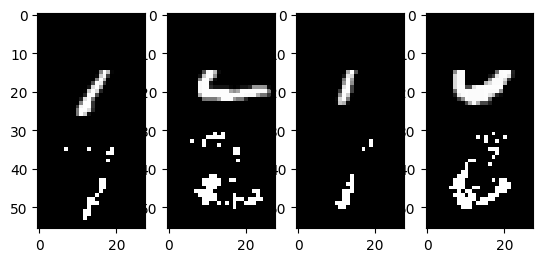

reconstruction_gibbs_steps = 5


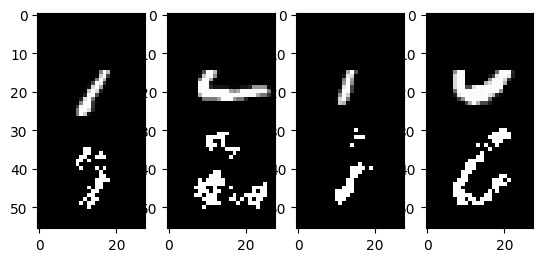

reconstruction_gibbs_steps = 10


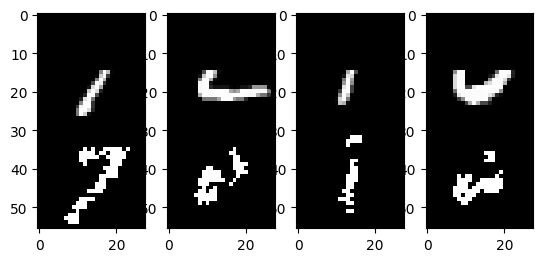

reconstruction_gibbs_steps = 100


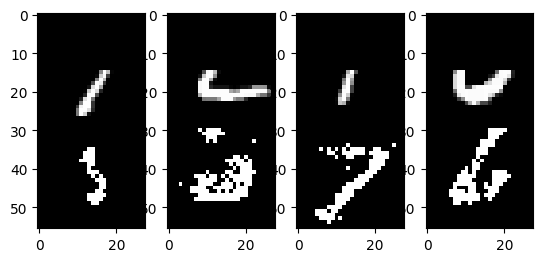


start_row_to_remove = 0, end_row_to_remove = 18
reconstruction_gibbs_steps = 1


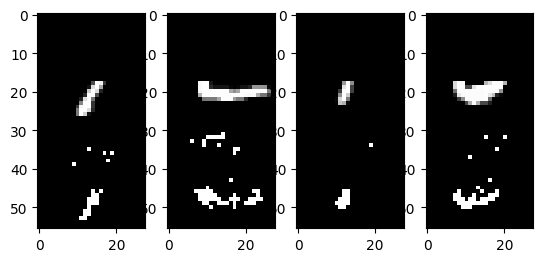

reconstruction_gibbs_steps = 5


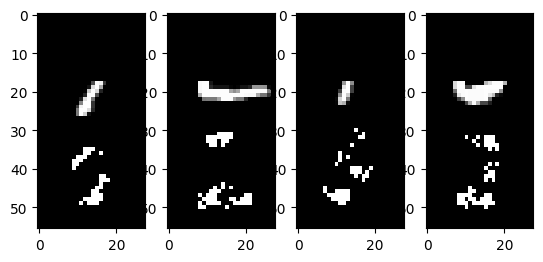

reconstruction_gibbs_steps = 10


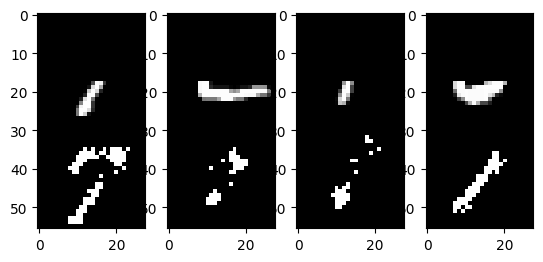

reconstruction_gibbs_steps = 100


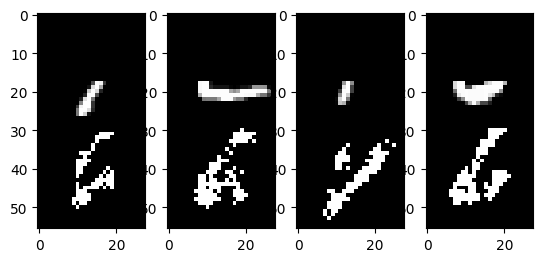


start_row_to_remove = 0, end_row_to_remove = 20
reconstruction_gibbs_steps = 1


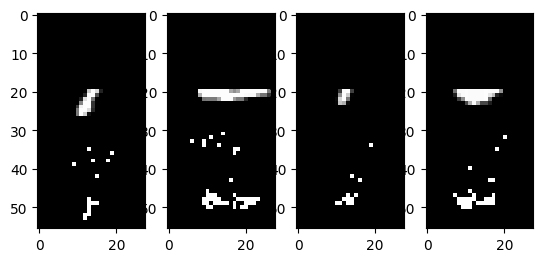

reconstruction_gibbs_steps = 5


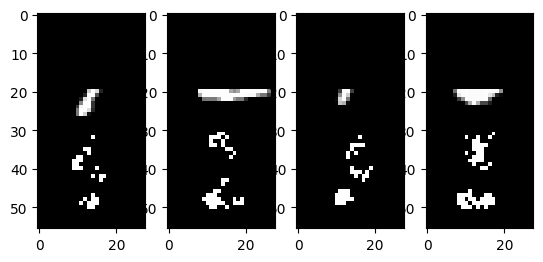

reconstruction_gibbs_steps = 10


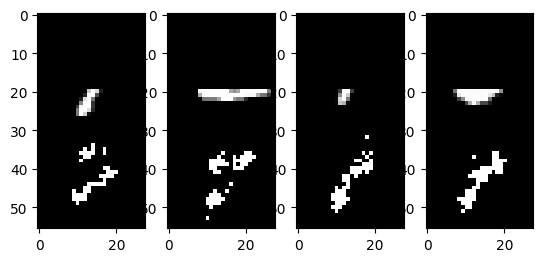

reconstruction_gibbs_steps = 100


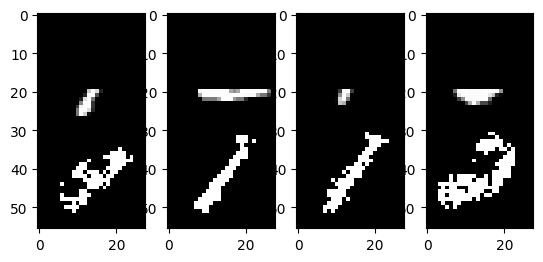

In [ ]:
start_row_to_remove = 0
for end_row_to_remove in [10, 13, 15, 18, 20]:
  rbm3 = copy.deepcopy(rbm)

  start_test_index = 0
  nr = 4
  # start_row_to_remove = 0
  end_row_to_remove = start_row_to_remove + end_row_to_remove
  print(f"\n{start_row_to_remove = }, {end_row_to_remove = }")
  for reconstruction_gibbs_steps in [1, 5, 10, 100]:
    print(f"{reconstruction_gibbs_steps = }")

    to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
    to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
    reconstructed = np.zeros(to_reconstruct.shape)
    for i in range(nr):
      reconstructed[i] = rbm_gibbs_sample_image(rbm3, to_reconstruct[i], reconstruction_gibbs_steps).reshape((28,28))
    combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
    fig = plt.figure()
    for i in range(nr):
      ax1 = fig.add_subplot(1,nr,i+1)
      ax1.imshow(combined_images[i])

    plt.show()


start_row_to_remove = 10, end_row_to_remove = 10
reconstruction_gibbs_steps = 1


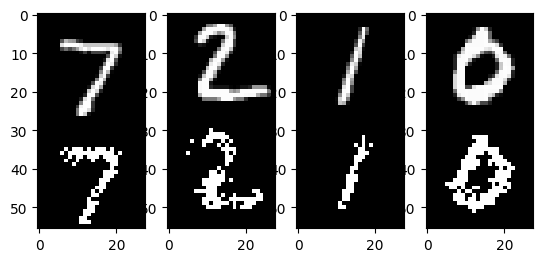

reconstruction_gibbs_steps = 5


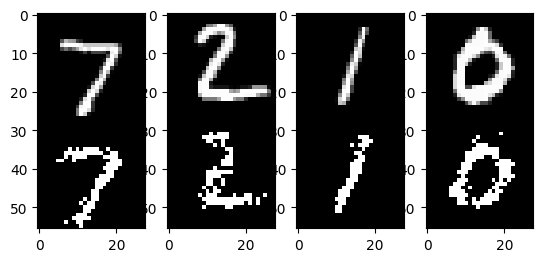

reconstruction_gibbs_steps = 10


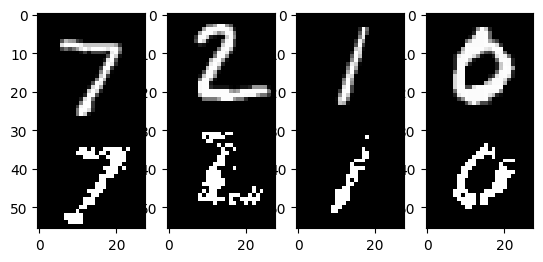

reconstruction_gibbs_steps = 100


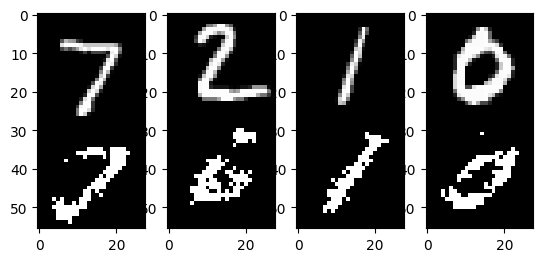


start_row_to_remove = 10, end_row_to_remove = 13
reconstruction_gibbs_steps = 1


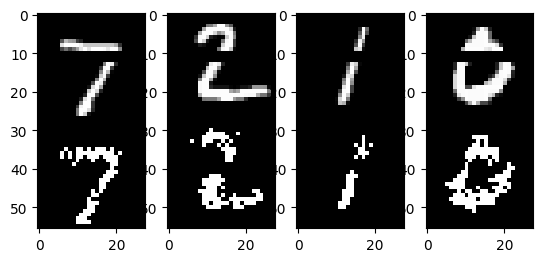

reconstruction_gibbs_steps = 5


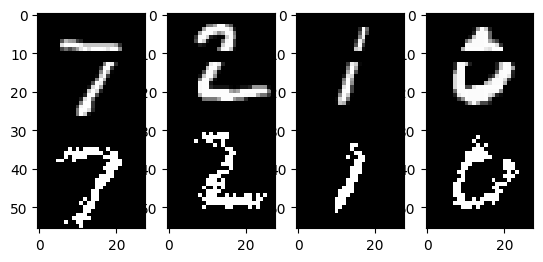

reconstruction_gibbs_steps = 10


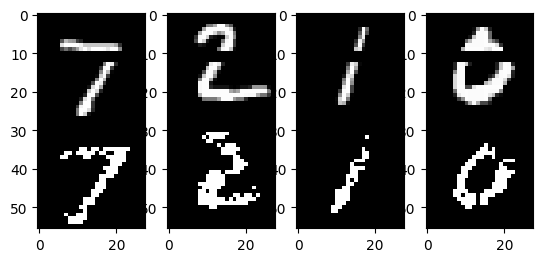

reconstruction_gibbs_steps = 100


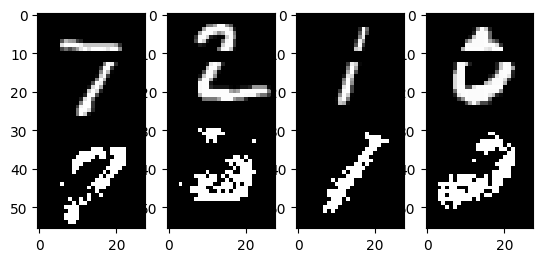


start_row_to_remove = 10, end_row_to_remove = 15
reconstruction_gibbs_steps = 1


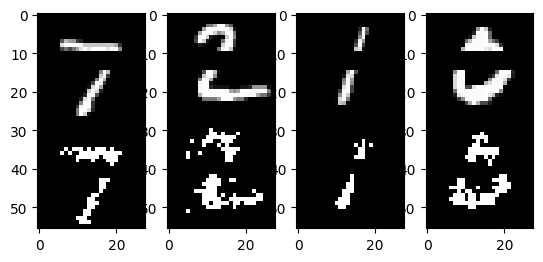

reconstruction_gibbs_steps = 5


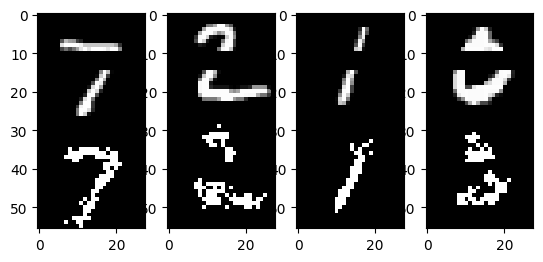

reconstruction_gibbs_steps = 10


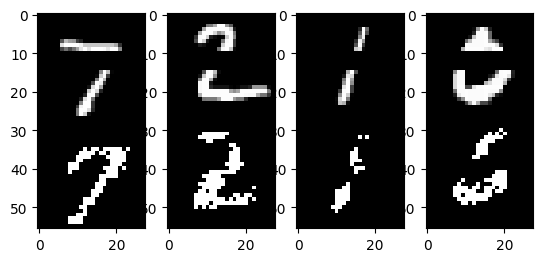

reconstruction_gibbs_steps = 100


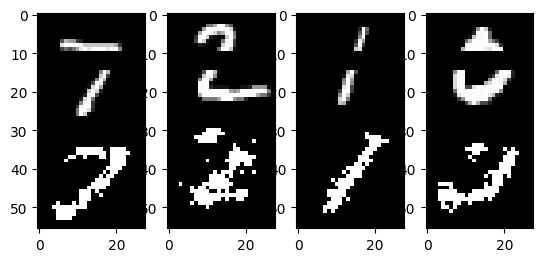


start_row_to_remove = 10, end_row_to_remove = 18
reconstruction_gibbs_steps = 1


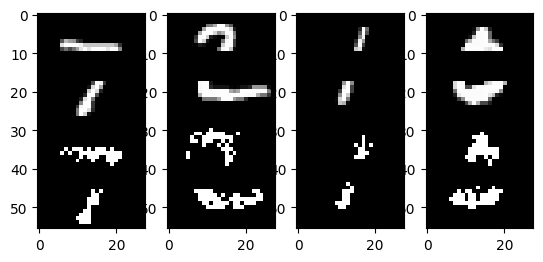

reconstruction_gibbs_steps = 5


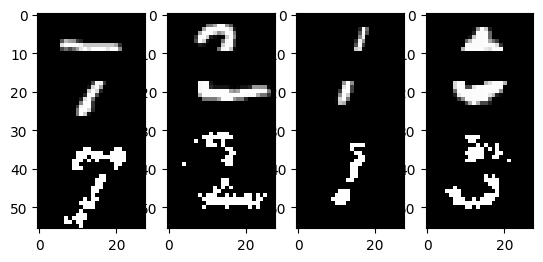

reconstruction_gibbs_steps = 10


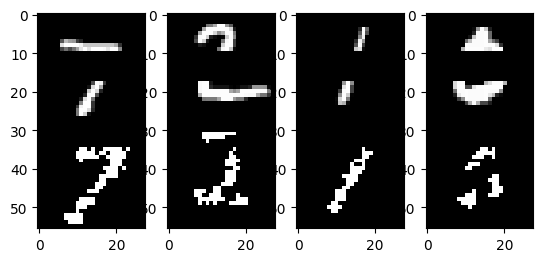

reconstruction_gibbs_steps = 100


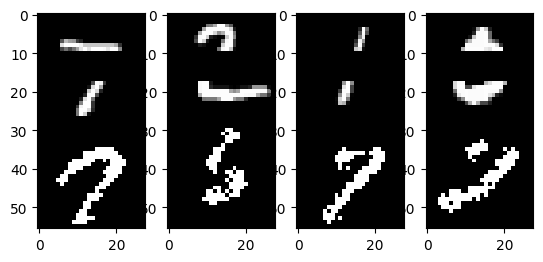


start_row_to_remove = 10, end_row_to_remove = 20
reconstruction_gibbs_steps = 1


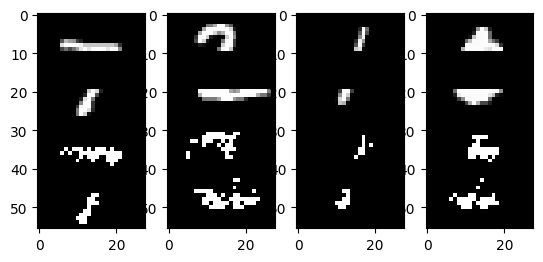

reconstruction_gibbs_steps = 5


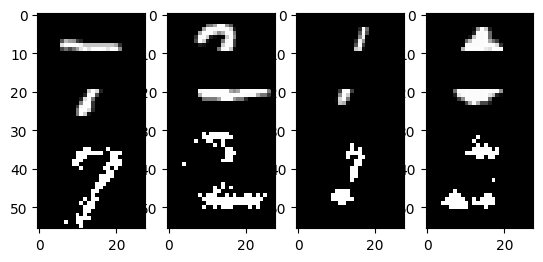

reconstruction_gibbs_steps = 10


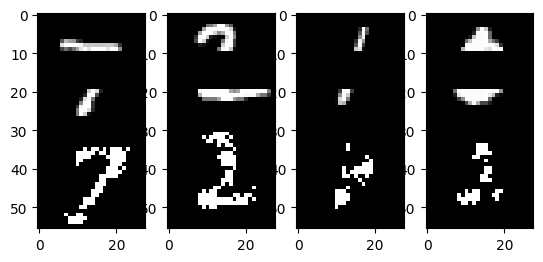

reconstruction_gibbs_steps = 100


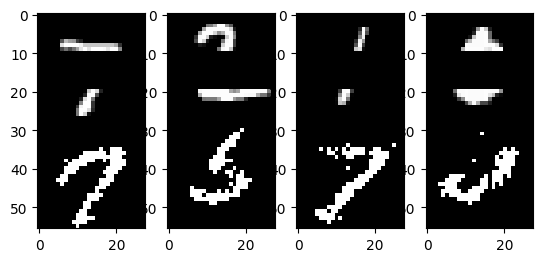


start_row_to_remove = 20, end_row_to_remove = 20
reconstruction_gibbs_steps = 1


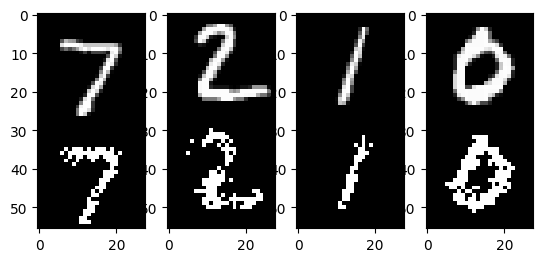

reconstruction_gibbs_steps = 5


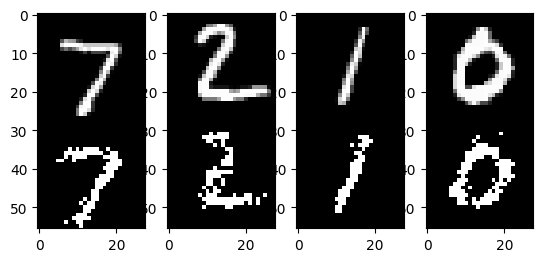

reconstruction_gibbs_steps = 10


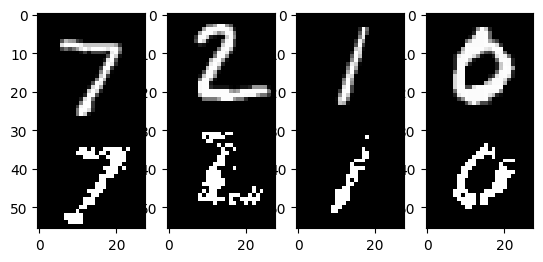

reconstruction_gibbs_steps = 100


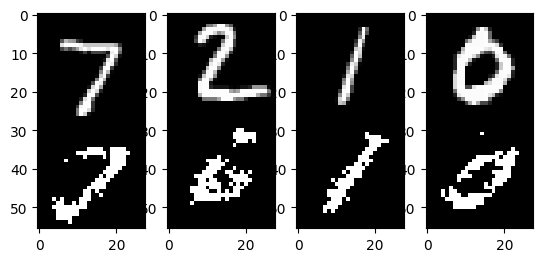


start_row_to_remove = 20, end_row_to_remove = 23
reconstruction_gibbs_steps = 1


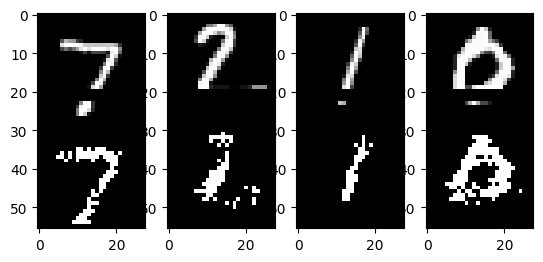

reconstruction_gibbs_steps = 5


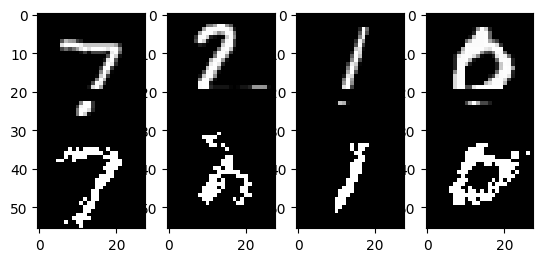

reconstruction_gibbs_steps = 10


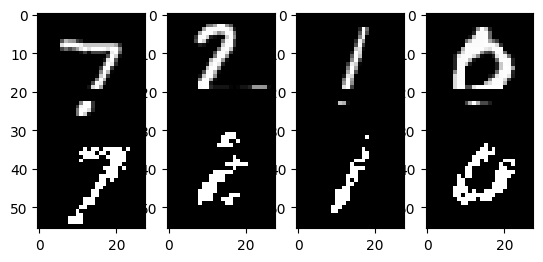

reconstruction_gibbs_steps = 100


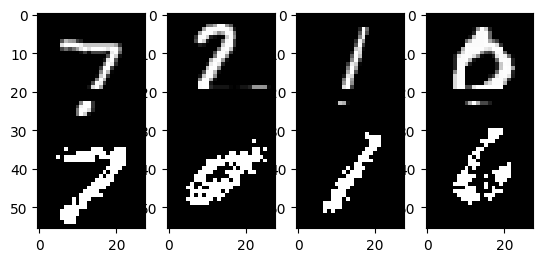


start_row_to_remove = 20, end_row_to_remove = 25
reconstruction_gibbs_steps = 1


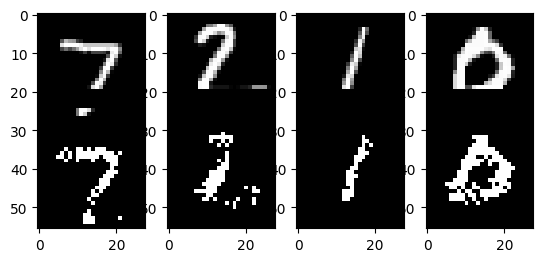

reconstruction_gibbs_steps = 5


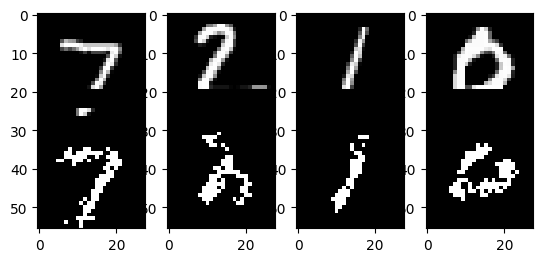

reconstruction_gibbs_steps = 10


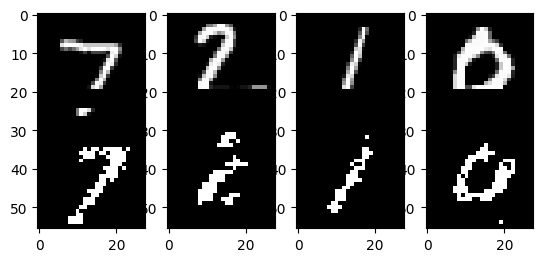

reconstruction_gibbs_steps = 100


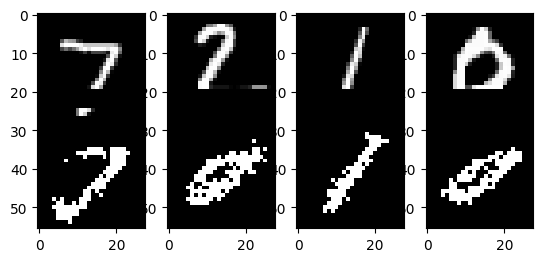


start_row_to_remove = 20, end_row_to_remove = 28
reconstruction_gibbs_steps = 1


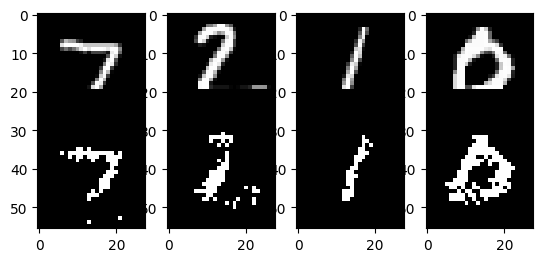

reconstruction_gibbs_steps = 5


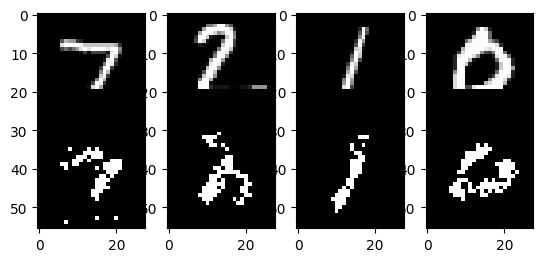

reconstruction_gibbs_steps = 10


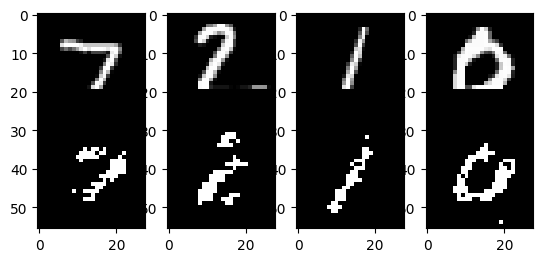

reconstruction_gibbs_steps = 100


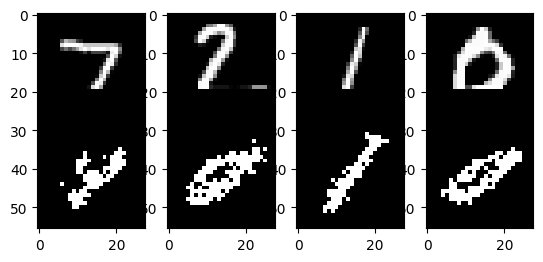


start_row_to_remove = 20, end_row_to_remove = 30
reconstruction_gibbs_steps = 1


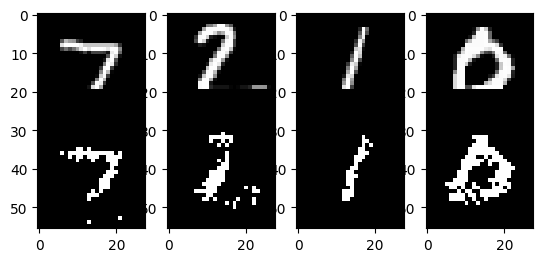

reconstruction_gibbs_steps = 5


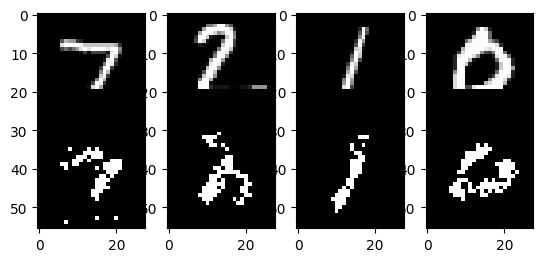

reconstruction_gibbs_steps = 10


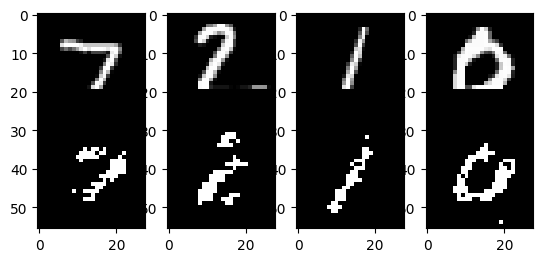

reconstruction_gibbs_steps = 100


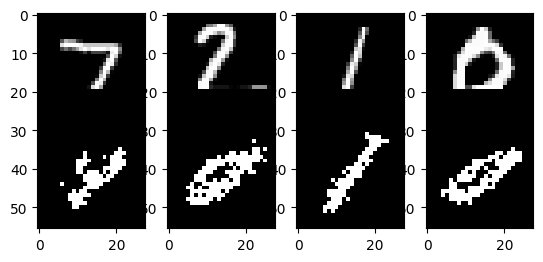

In [ ]:
for start_row_to_remove in [10, 20]:
  for end_row_to_remove in [0, 3, 5, 8, 10]:
    rbm3 = copy.deepcopy(rbm)

    start_test_index = 0
    nr = 4
    # start_row_to_remove = 0
    end_row_to_remove = start_row_to_remove + end_row_to_remove
    print(f"\n{start_row_to_remove = }, {end_row_to_remove = }")
    for reconstruction_gibbs_steps in [1, 5, 10, 100]:
      print(f"{reconstruction_gibbs_steps = }")

      to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
      to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
      reconstructed = np.zeros(to_reconstruct.shape)
      for i in range(nr):
        reconstructed[i] = rbm_gibbs_sample_image(rbm3, to_reconstruct[i], reconstruction_gibbs_steps).reshape((28,28))
      combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
      fig = plt.figure()
      for i in range(nr):
        ax1 = fig.add_subplot(1,nr,i+1)
        ax1.imshow(combined_images[i])

      plt.show()

## Component Visualization
In the final cell, the components (weights of each neuron) of the RBM are shown.<br/>
Observing these components (think back to CNNs) may offer insights into the trained model.

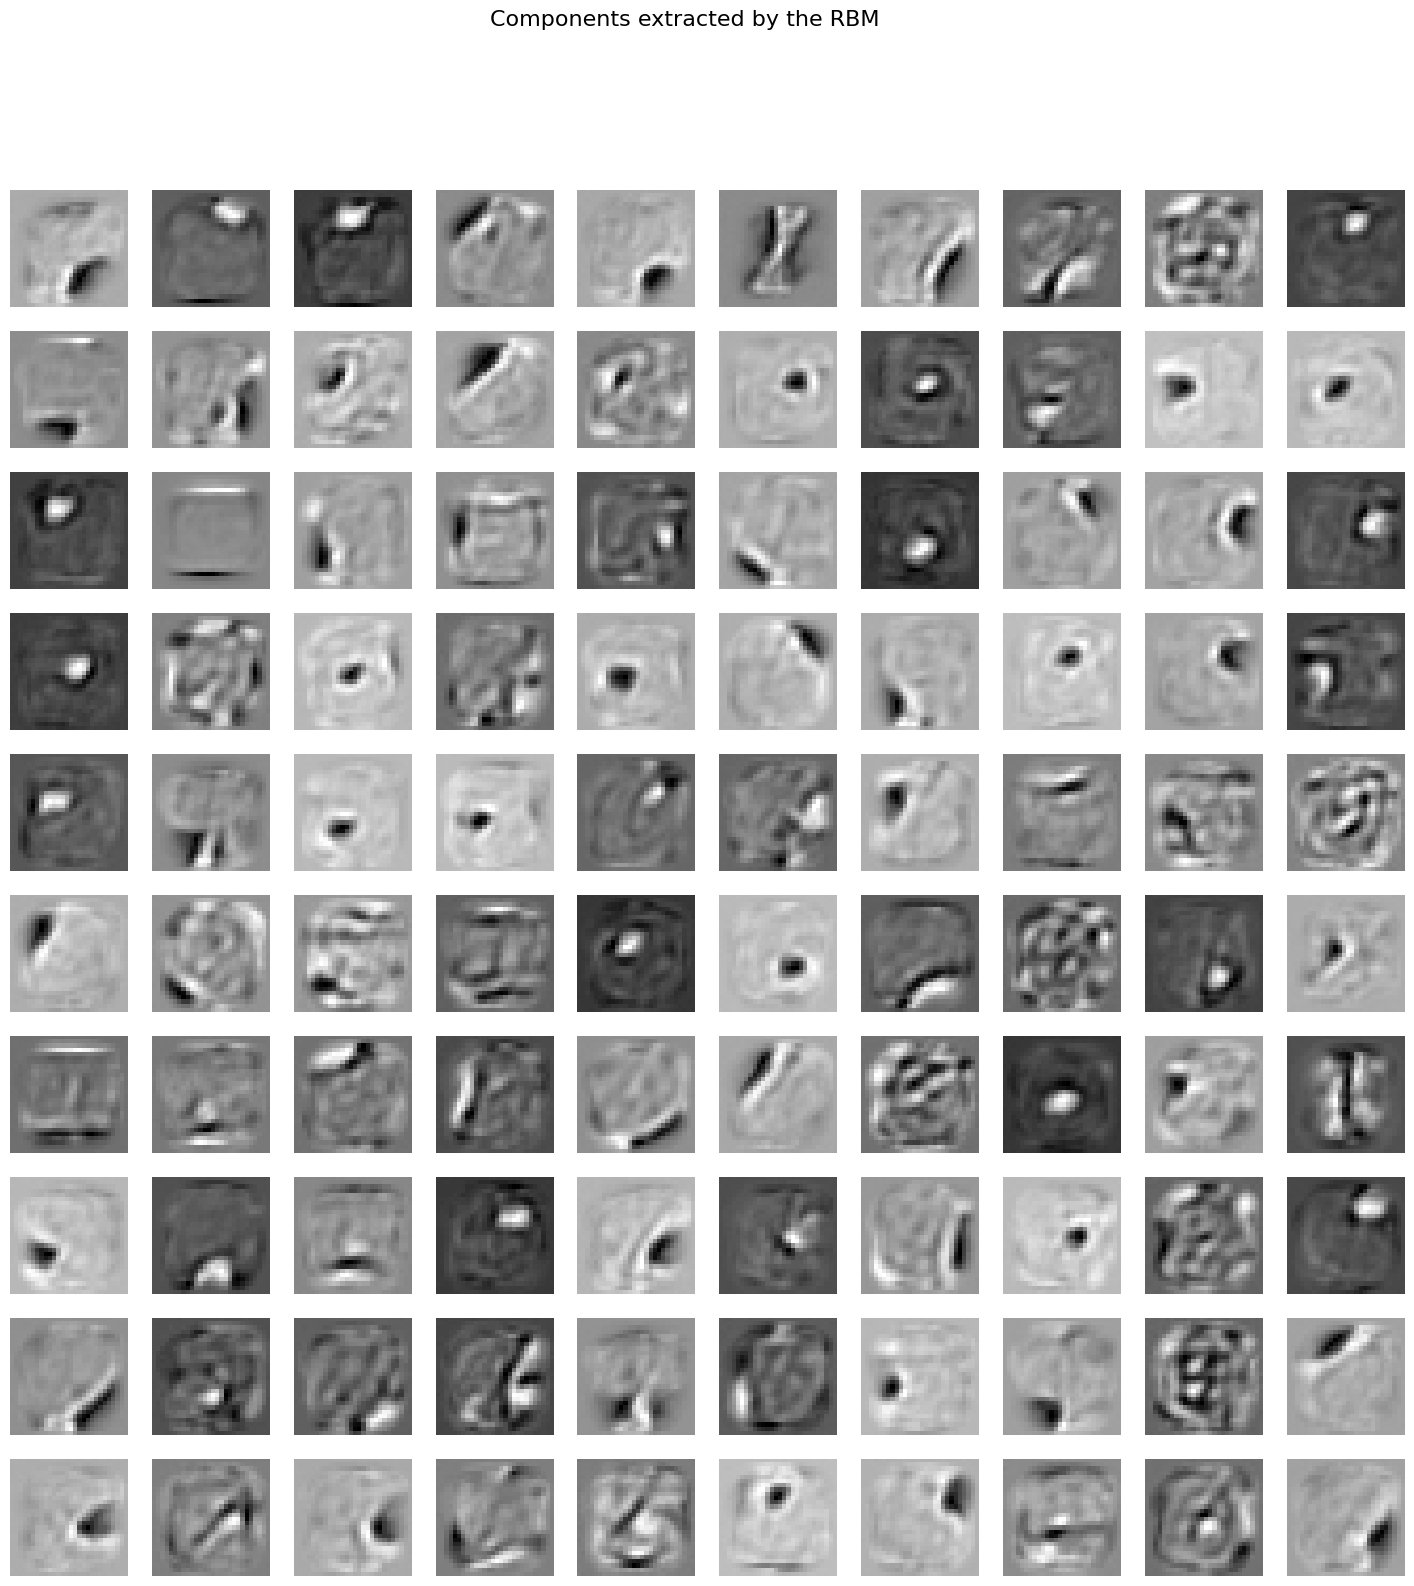

In [ ]:
plt.figure(figsize=(18, 18))
nr_components = rbm.components_.shape[0]
for i in range(nr_components):
    c = rbm.components_[i]
    plt.subplot(10, int(np.ceil(nr_components/10)), i + 1)
    plt.imshow(c.reshape((28, 28)), cmap = "gray", interpolation='nearest')
    plt.axis('off')

plt.suptitle('Components extracted by the RBM', fontsize=16);